In [8]:
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)
def function_1(x):
    return 0.01*x**2+0.1*x
import numpy as np 
import matplotlib.pylab as plt
x=np.arange(0.0,20.0,0.1)
y=function_1(x)
 

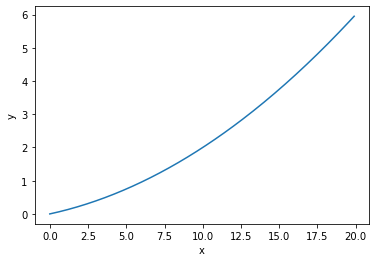

In [9]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

计算导数

In [10]:
numerical_diff(function_1,5)

0.1999999999990898

In [11]:

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [12]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

0.1999999999990898


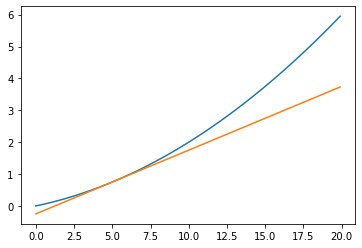

In [16]:
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

梯度，求由全部变量的偏导数汇总而成的向量称为梯度（gradient）

In [23]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad

In [25]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [27]:
import sys,os
path=sys.path.append(os.pardir)
print(path)

None


In [31]:
from common.functions  import softmax,cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)#生成随机权重矩阵
    def predict(self,x):#基于矩阵得到第一层的z=wx+b 神经网路输入参数
        return np.dot(x,self.W)
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)#得到预测结果
        loss=cross_entropy_error(y,t)#计算损失
        return loss
net=simpleNet()
print(net.W)

[[-1.04301132e-03 -2.28526471e-01  5.75816336e-01]
 [ 3.76044266e-01  1.72143813e+00 -1.08778226e+00]]


In [32]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

[ 0.33781403  1.41217844 -0.63351423]


In [33]:
y=softmax(p)

In [34]:
print(y)

[0.23219575 0.67989962 0.08790463]


In [36]:
t=np.array([0,0,1])
np.argmax(p)

1

In [38]:
net.loss(x,t)

2.4315016405155028

In [39]:
dW=numerical_gradient(net.loss(x,t),net.W)#计算相对于权重，损失函数的偏导（梯度）
print(dW)

TypeError: 'numpy.float64' object is not callable

In [40]:
f=lambda w:net.loss(x,t)
dW=numerical_gradient(f,net.W)

In [41]:
print(dW)

[[ 0.13932371  0.40793362 -0.54725733]
 [ 0.20898556  0.61190044 -0.820886  ]]


In [45]:
np.argmax(abs(dW))

5

# 神经网络算法的实现步骤
## 前提：
神经网路存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为学习，分为四个步骤
## 步骤（随机梯度下降法-SGD）
1. mini-batch
从训练数据中随机选出一部分数据，称为mini-batch，目标是减少mini-batch的损失函数值
2.计算梯度
为了减少mini-batch的损失函数值，需要求出各个权重参数的梯度。梯度标识损失函数值减少最多的方向
3.更新参数
将权重参数沿着梯度方向进行微小更新
4.重复
重复步骤1，2，3

In [46]:
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [54]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,wd=0.01):#input_size:输入层神经元数目,hidden_size：隐藏层神经元数目,output_size：输出层神经元数目,weight_init_std=0.01
        self.params={}
        self.params['W1']=wd*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=wd*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']

        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.armax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy
    def numerical_gradient(self,x,y):
        loss_W=lambda W:self.loss(x,t)

        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])
        return grads

In [47]:
np.random.randn(2,3)

array([[-0.96176139,  0.93457471, -1.17758463],
       [ 1.56087716,  2.10372679,  0.07135513]])

In [55]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

In [51]:
net.params['W1'].shape

(784, 100)

In [56]:
x=np.random.rand(100,784)
y=net.predict(x)

In [57]:
y

array([[0.10201456, 0.09815212, 0.10541861, 0.09704843, 0.10125023,
        0.09964964, 0.09431376, 0.09921376, 0.10119792, 0.10174098],
       [0.10201825, 0.09826275, 0.10547844, 0.09722148, 0.10096696,
        0.09955671, 0.09458072, 0.09927348, 0.1005499 , 0.10209133],
       [0.10200928, 0.09793111, 0.10530339, 0.09711762, 0.1012466 ,
        0.09961312, 0.09426445, 0.09907786, 0.1015679 , 0.10186867],
       [0.10190547, 0.09783742, 0.10563684, 0.09739528, 0.10136104,
        0.09947854, 0.09445724, 0.0992953 , 0.10092455, 0.10170833],
       [0.10176666, 0.09806066, 0.10549136, 0.0976351 , 0.10105174,
        0.09986935, 0.09449983, 0.09901401, 0.10101671, 0.10159459],
       [0.10192089, 0.09830148, 0.10555598, 0.09704151, 0.10091846,
        0.09976594, 0.09474555, 0.09910263, 0.10081082, 0.10183674],
       [0.101819  , 0.09818387, 0.10581407, 0.09729301, 0.10124694,
        0.10022218, 0.09429187, 0.0988143 , 0.10070118, 0.10161357],
       [0.10186891, 0.09801519, 0.1052718

结合mini-batch实现神经网络学习

In [60]:
import numpy as np
from dataset.mnist import load_mnist
path=sys.path.append(os.pardir)

from ch04.two_layer_net import TwoLayerNet

In [ ]:
(x_train,t_train),(x_test,y_test)=load_mnist(normalize=True,one_hot_label=True)

Done
Done
